In [ ]:
### Multi variate Linear Regression Analysis. Models Lasso and Ridge. X = Country and Year

In [3]:
import os
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [4]:
data1 = pd.read_csv('../data/literacy_rate_public.csv')
print(f"Shape of the data is: {data1.shape}")
data1.head()

Shape of the data is: (140, 3)


,country,literacyRate,population
0,Afghanistan,43.0,38928346
1,Albania,98.1,2877797
2,Algeria,81.4,43851044
3,Angola,71.1,32866272
4,Australia,99.0,97929


In [5]:
data1.set_index('country')
data1.head()

,country,literacyRate,population
0,Afghanistan,43.0,38928346
1,Albania,98.1,2877797
2,Algeria,81.4,43851044
3,Angola,71.1,32866272
4,Australia,99.0,97929


In [6]:
data2 = pd.read_csv('../data/skill_migration_public.csv')
print(f"Shape of the data is: {data2.shape}")
data2.head()

Shape of the data is: (88085, 9)


,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015


In [7]:
data2.set_index('country')

,country_code,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year
country,,,,,,,,
Afghanistan,af,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015
Afghanistan,af,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015
Afghanistan,af,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015
Afghanistan,af,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015
Afghanistan,af,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015
...,...,...,...,...,...,...,...,...
Zimbabwe,zw,Low income,Sub-Saharan Africa,12666,Specialized Industry Skills,Teaching,-94,2019
Zimbabwe,zw,Low income,Sub-Saharan Africa,1235,Specialized Industry Skills,Mining,-93,2019
Zimbabwe,zw,Low income,Sub-Saharan Africa,43756,Specialized Industry Skills,Personal Coaching,-82,2019


In [8]:
data3 = pd.read_csv('../data/gdp_public.csv')
print(f"Shape of the data is: {data2.shape}")
data3.head()

Shape of the data is: (88085, 9)


,rank,country,gdpPerCapita
0,1,United States,67063.2695
1,2,China,10746.7828
2,3,Japan,43450.1405
3,4,Germany,49617.1450
4,5,India,2360.6592


In [9]:
combined_data1 = pd.merge(data2, data1, on='country', how='inner')
combined_data1

,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year,literacyRate,population
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015,43.0,38928346
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015,43.0,38928346
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015,43.0,38928346
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015,43.0,38928346
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015,43.0,38928346
...,...,...,...,...,...,...,...,...,...,...,...
86560,zw,Zimbabwe,Low income,Sub-Saharan Africa,12666,Specialized Industry Skills,Teaching,-94,2019,86.5,14862924
86561,zw,Zimbabwe,Low income,Sub-Saharan Africa,1235,Specialized Industry Skills,Mining,-93,2019,86.5,14862924
86562,zw,Zimbabwe,Low income,Sub-Saharan Africa,43756,Specialized Industry Skills,Personal Coaching,-82,2019,86.5,14862924
86563,zw,Zimbabwe,Low income,Sub-Saharan Africa,1724,Specialized Industry Skills,Public Health,-32,2019,86.5,14862924


In [10]:
combined_data = pd.merge(combined_data1, data3, on='country', how='inner')
combined_data

,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year,literacyRate,population,rank,gdpPerCapita
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-792,2015,43.0,38928346,116,531.2838
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610,2015,43.0,38928346,116,531.2838
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731,2015,43.0,38928346,116,531.2838
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-958,2015,43.0,38928346,116,531.2838
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1511,2015,43.0,38928346,116,531.2838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84195,zw,Zimbabwe,Low income,Sub-Saharan Africa,12666,Specialized Industry Skills,Teaching,-94,2019,86.5,14862924,108,1736.6704
84196,zw,Zimbabwe,Low income,Sub-Saharan Africa,1235,Specialized Industry Skills,Mining,-93,2019,86.5,14862924,108,1736.6704
84197,zw,Zimbabwe,Low income,Sub-Saharan Africa,43756,Specialized Industry Skills,Personal Coaching,-82,2019,86.5,14862924,108,1736.6704
84198,zw,Zimbabwe,Low income,Sub-Saharan Africa,1724,Specialized Industry Skills,Public Health,-32,2019,86.5,14862924,108,1736.6704


In [11]:
combined_data.dtypes

country_code       object
country            object
income_group       object
world_region       object
skill_group_id      int64
skill_group        object
skill              object
Delta               int64
Year                int64
literacyRate      float64
population          int64
rank                int64
gdpPerCapita      float64
dtype: object

In [12]:
combined_data[combined_data['population'].isnull()==True]

,country_code,country,income_group,world_region,skill_group_id,skill_group,skill,Delta,Year,literacyRate,population,rank,gdpPerCapita


In [13]:
combined_data.dtypes

country_code       object
country            object
income_group       object
world_region       object
skill_group_id      int64
skill_group        object
skill              object
Delta               int64
Year                int64
literacyRate      float64
population          int64
rank                int64
gdpPerCapita      float64
dtype: object

In [14]:
len(combined_data.columns)

13

In [15]:
combined_data.isnull().sum()

country_code      0
country           0
income_group      0
world_region      0
skill_group_id    0
skill_group       0
skill             0
Delta             0
Year              0
literacyRate      0
population        0
rank              0
gdpPerCapita      0
dtype: int64

In [16]:
### Encoding Values for 'Skill Groups', 'Year' and 'Country'

In [17]:
combined_data.dtypes

country_code       object
country            object
income_group       object
world_region       object
skill_group_id      int64
skill_group        object
skill              object
Delta               int64
Year                int64
literacyRate      float64
population          int64
rank                int64
gdpPerCapita      float64
dtype: object

In [119]:
combined_data['delta_status'] = combined_data.apply(lambda x: 1 if x['Delta']> 0 else 0, axis=1)

income_values = {'Upper middle income': 4, 'Lower middle income': 3, 'Low income': 2, 'High income': 1}
#combined_data.replace({'income_group': income_values}, inplace=True)

X1=combined_data.copy()[['population', 'literacyRate','rank', 'gdpPerCapita', 'delta_status', 'Year', 'income_group']]
X1=X1.drop_duplicates(X1.columns)

In [120]:
X = X1.drop(['delta_status'], axis=1)
y = X1["delta_status"].values.reshape(-1,1)
print(X.shape, y.shape)

(1210, 6) (1210, 1)


In [121]:
###########   Choose Skill to Train 

In [128]:
X1.corr()

,population,literacyRate,rank,gdpPerCapita,delta_status,Year,income_group
population,1.000000,-0.042236,-0.253873,-0.094137,-0.011971,-0.012560,0.161100
literacyRate,-0.042236,1.000000,-0.365142,0.334413,0.017617,0.014223,-0.112283
rank,-0.253873,-0.365142,1.000000,-0.448404,-0.054377,0.012087,0.229718
gdpPerCapita,-0.094137,0.334413,-0.448404,1.000000,0.067930,-0.004781,-0.631624
delta_status,-0.011971,0.017617,-0.054377,0.067930,1.000000,-0.009823,-0.069532
Year,-0.012560,0.014223,0.012087,-0.004781,-0.009823,1.000000,-0.003426
income_group,0.161100,-0.112283,0.229718,-0.631624,-0.069532,-0.003426,1.000000


In [123]:
y=y.ravel()
print(len(y))
y

1210


array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [124]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### END SOLUTION

In [125]:
### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=10)
### END SOLUTION

In [126]:
### BEGIN SOLUTION

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
model.coef_

Training Score: 0.007782223857244919
Testing Score: -0.004659811691548832


array([ 2.17649738e-11,  4.76296207e-04, -3.99344288e-04,  5.35075526e-07,
        1.55577791e-03, -1.70846991e-02])

Text(0, 0.5, 'Residual')

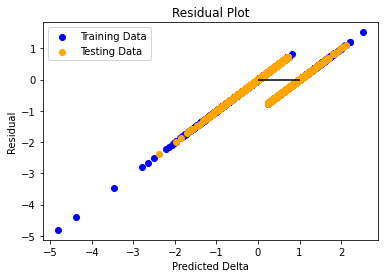

In [96]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.xlabel("Predicted Delta")
plt.ylabel("Residual")
### END SOLUTION

In [97]:
X_train.shape

(45986, 7)

In [98]:
# test2=X_train[X_train['country_Afghanistan']==1].iloc[0]
# print('Test: ', test2.to_frame().transpose().head())
# print('Prediction: ', model.predict(test2.to_frame().transpose()))

In [99]:
y_train[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [100]:
#sorted(model.predict(X_train[X_train['country_India']==1]))

In [101]:
y_train.shape

(45986,)

In [102]:
from sklearn.linear_model import Ridge

Ridge_model = Ridge()

param_grid = {"alpha" : [0.001, 0.01, 0.1, 1, 2, 5]}

In [103]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(Ridge_model, param_grid=param_grid, cv=3, verbose=2)

In [104]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=2 .........................................................
[CV] .......................................... alpha=2, total=   0.0s
[CV] alpha=2 .........................................................
[CV] .......................................... alpha=2, total=   0.0s
[CV] alpha=2 .........................................................
[CV] .......................................... alpha=2, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5]}, verbose=2)

In [105]:
grid.best_params_

{'alpha': 5}

In [106]:
grid.score(X_test, y_test)

0.4286120502701368

In [107]:
from sklearn.linear_model import Lasso

Lasso_model = Lasso()

param_grid = {"alpha" : [0.001, 0.01, 0.1, 1, 2, 5]}

In [108]:
from sklearn.model_selection import GridSearchCV

lasso_grid = GridSearchCV(Lasso_model, param_grid=param_grid, cv=3, verbose=2)

In [109]:
lasso_grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5]}, verbose=2)

In [110]:
lasso_grid.best_params_

{'alpha': 0.001}

In [111]:
lasso_grid.score(X_test, y_test)

0.42855446236239636

In [112]:
import pickle

with open('../models/LS_model.pkl','wb') as f:
    pickle.dump(lasso_grid, f)

In [113]:
with open('../models/LS_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [114]:
with open('../models/LS_model_columns.txt', 'wb') as g:
    pickle.dump(X_test.columns, g )

In [115]:
with open('../models/LS_model_columns.txt', 'rb') as g:
    modelColumns = pickle.load(g)

In [116]:
for i in range(5):
    print(modelColumns[i])
modelColumns.shape

population
literacyRate
rank
gdpPerCapita
Year


(7,)

In [117]:
print(f"Test set score: {model.score(X_test, y_test)}")

Test set score: 0.42855446236239636


In [118]:
model

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5]}, verbose=2)